In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from time import time
from NaiveModel import Naive
from sklearn import datasets

''' Shuffles feature matrix and labels in case they are ordered '''
def shuffle(x,y):
    z = list(zip(x,y))
    np.random.shuffle(z)
    x,y = zip(*z)
    return np.array(x),np.array(y)

''' Splits feature matrix and labels into training and testing data '''
def split(x,y,split_percentage):
    split_idx = int(len(y)*split_percentage)
    z = list(zip(x,y))
    z1 = z[:split_idx]
    z2 = z[split_idx:]
    x1,y1 = zip(*z1)
    x2,y2 = zip(*z2)
    return np.array(x1),np.array(y1),np.array(x2),np.array(y2)

''' Generates 2 normally distributed clusters to be used as positive and negative examples '''
def gen_random(p_size, n_size, dims):
    p_mean = np.random.randint(50, size = dims)
    n_mean = np.random.randint(50, size = dims)
    p_sig = (np.random.randint(5, size = dims)+1)*10
    n_sig = (np.random.randint(5, size = dims)+1)*10

    p_data = np.random.normal(p_mean, p_sig, (p_size,dims))
    n_data = np.random.normal(n_mean, n_sig, (n_size,dims))
    labels = np.array([1]*p_size+[0]*n_size)

    data = np.vstack((p_data,n_data))
    data,labels = shuffle(data,labels)
    return data,labels


''' 
performs binary classification over X with the provided model 
    and prints out some useful info
'''
def evaluate(model, X, y):
    X,y = shuffle(X,y)
    x_train, y_train, x_test, y_actual = split(X,y,.70)
    model = model()
    t0 = time()
    model.fit(x_train,y_train)
    t1 = time()
    
    # Shows the decision boundary for each dimension
    #model.plotActivations()

    y_predict = model.predict(x_test)
    t2 = time()
    correct = y_predict == y_actual
    accuracy = correct.sum()/correct.shape[0]
    fp = (y_predict-1 == y_actual).sum()/(y_predict.sum())
    tn = (y_predict+1 == y_actual).sum()/((y_predict-1).sum()*-1)
    print("Accuracy: {}\nFalse Positives: {}\nTrue Negatives: {}\nTime to fit: {}\nTime to predict: {}".format(accuracy,fp, tn, t1-t0, t2-t1))
    plt.scatter(x_test[:,0],x_test[:,1],cmap = 'cividis', c = y_predict, marker = '.')
    plt.show()



Artificial
Model: Naive
-----------------------
Accuracy: 0.9316666666666666
False Positives: 0.10155062328975373
True Negatives: 0.028033935817041684
Time to fit: 0.0019345283508300781
Time to predict: 0.0005726814270019531


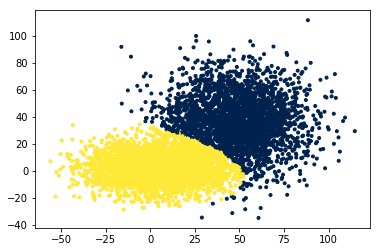



Artificial
Model: GaussianNB
-----------------------
Accuracy: 0.9475
False Positives: 0.06177231565329883
True Negatives: 0.04264099037138927
Time to fit: 0.0031037330627441406
Time to predict: 0.0006079673767089844


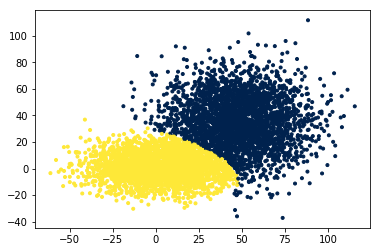

In [2]:
'''
-------------------------------------------------------------------
----------Test on Artificial Dataset-------------------------------------
-------------------------------------------------------------------
'''
X,y = gen_random(10000, 10000, 2)
#plt.scatter(data[:,0],data[:,1],cmap = 'cividis', c = labels, marker = '.')
#plt.show()

print("\n\nArtificial")
print("Model: Naive\n-----------------------")
evaluate(Naive, X,y)

print("\n\nArtificial")
print("Model: GaussianNB\n-----------------------")
evaluate(GaussianNB, X,y)





IRIS
Model: Naive
-----------------------
Accuracy: 1.0
False Positives: 0.0
True Negatives: 0.0
Time to fit: 0.006355762481689453
Time to predict: 0.00011706352233886719


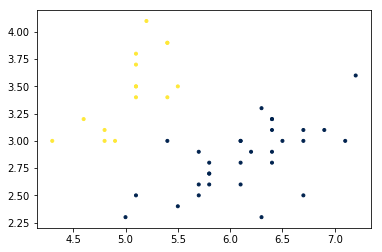



IRIS
Model: GaussianNB
-----------------------
Accuracy: 1.0
False Positives: 0.0
True Negatives: 0.0
Time to fit: 0.000873565673828125
Time to predict: 0.0002689361572265625


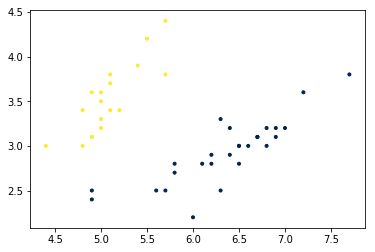

In [3]:
'''
-------------------------------------------------------------------
----------Test on IRIS Dataset-------------------------------------
-------------------------------------------------------------------
'''
iris = datasets.load_iris()
X = iris.data
y = (np.array(iris.target) ==0).astype(int)

print("\n\nIRIS\nModel: Naive\n-----------------------")
evaluate(Naive, X,y)

print("\n\nIRIS\nModel: GaussianNB\n-----------------------")
evaluate(GaussianNB, X,y)


## Terrible performance on Digits dataset



DIGITS
Model: Naive
-----------------------
Accuracy: 0.8888888888888888
False Positives: nan
True Negatives: 0.1111111111111111
Time to fit: 0.016814231872558594
Time to predict: 0.001070261001586914


/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in long_scalars


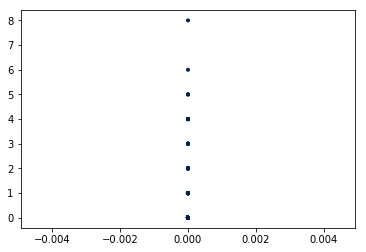



DIGITS
Model: GaussianNB
-----------------------
Accuracy: 0.9907407407407407
False Positives: 0.06153846153846154
True Negatives: 0.002105263157894737
Time to fit: 0.0024924278259277344
Time to predict: 0.0009355545043945312


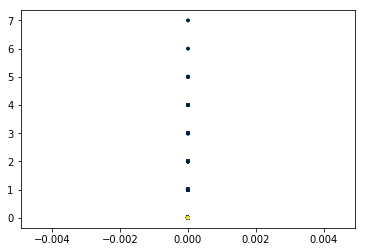

In [4]:
'''
-------------------------------------------------------------------
----------Test on DIGITS Dataset-------------------------------------
-------------------------------------------------------------------
'''
digits = datasets.load_digits()
X = digits.data
y = (np.array(digits.target) ==0).astype(int)


print("\n\nDIGITS\nModel: Naive\n-----------------------")
evaluate(Naive, X,y)

print("\n\nDIGITS\nModel: GaussianNB\n-----------------------")
evaluate(GaussianNB, X,y)

